# Heart Disease Exploratory Data Analysis (EDA)

This notebook covers the initial analysis of the UCI Heart Disease dataset.

## Step 0: Load Libraries and Data
First, we import the necessary libraries and load the dataset into a pandas DataFrame.

In [1]:
# 1. UPLOAD YOUR KAGGLE API TOKEN (if the session restarted)
from google.colab import files
import os
import pandas as pd

# This part is only needed if you haven't uploaded the key in this session
if not os.path.exists("/root/.kaggle/kaggle.json"):
    print('Please upload your kaggle.json file')
    files.upload()
    if not os.path.exists("/root/.kaggle"):
        os.makedirs("/root/.kaggle")
    os.rename("kaggle.json", "/root/.kaggle/kaggle.json")
    os.chmod("/root/.kaggle/kaggle.json", 600)

# 2. DOWNLOAD AND UNZIP THE DATASET
!kaggle datasets download -d redwankarimsony/heart-disease-data
!unzip -o -q heart-disease-data.zip # -o overwrites existing files

# 3. LOAD THE DATASET
df = pd.read_csv('heart_disease_uci.csv')

# Display the first 5 rows to confirm it's loaded
print("\nDataset loaded successfully!")
df.head()

Please upload your kaggle.json file


Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data
License(s): copyright-authors
  0% 0.00/12.4k [00:00<?, ?B/s]
100% 12.4k/12.4k [00:00<00:00, 42.9MB/s]

Dataset loaded successfully!


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


## Step 1: High-Level Overview

This gives us the basic shape and technical summary of the dataset. It helps us understand the number of rows (patients), columns (features), and the data types of each column.

In [2]:
# See the number of rows and columns
print("Data Shape:")
print(df.shape)
print("-" * 30)

# Get a technical summary (column names, non-null counts, data types)
print("Data Info:")
df.info()

Data Shape:
(920, 16)
------------------------------
Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


## Step 2: Check for Missing Values

This is one of the most important data quality checks. Missing data can cause errors or bias in our analysis and models.

In [3]:
# Check for any missing values in each column
print("Missing Values:")
print(df.isnull().sum())

Missing Values:
id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64


## Step 3: Get a Statistical Summary

This provides a quick statistical overview of all numerical columns, including measures like mean, standard deviation, min, and max. It's useful for spotting outliers or potential data entry errors.

In [4]:
# Get descriptive statistics (mean, std, min, max, etc.)
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


## Step 4: Visualize the Outcome

We visualize the distribution of our target variable (`target`) to see how many patients in the dataset have heart disease versus those who don't. This helps us check for class imbalance.

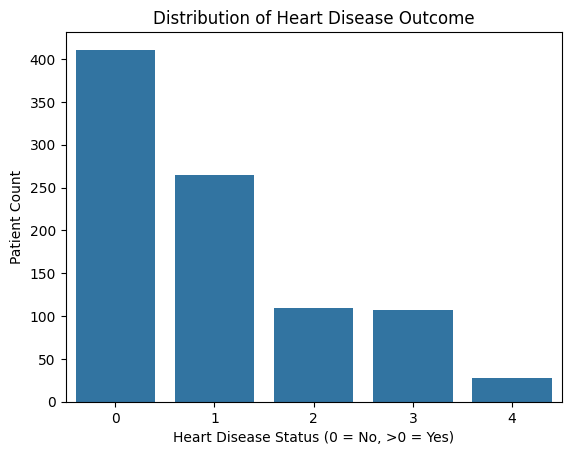

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a plot using the correct column name 'num'
sns.countplot(x='num', data=df)

# Add a title and updated labels for clarity
plt.title('Distribution of Heart Disease Outcome')
plt.xlabel('Heart Disease Status (0 = No, >0 = Yes)')
plt.ylabel('Patient Count')

# Display the plot
plt.show()

In [9]:
# Create a new binary column: 0 for no disease, 1 for presence of disease
df['has_disease'] = (df['num'] > 0).astype(int)

# Check the first 5 rows to see the new column
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num,has_disease
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2,1
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0,0


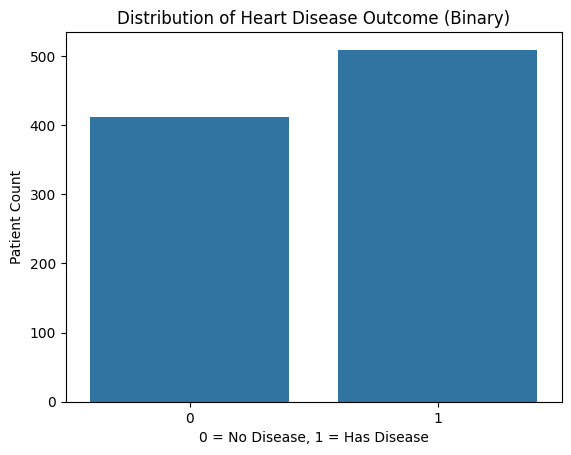

In [10]:
# Create a plot of our new, simplified target variable
sns.countplot(x='has_disease', data=df)
plt.title('Distribution of Heart Disease Outcome (Binary)')
plt.xlabel('0 = No Disease, 1 = Has Disease')
plt.ylabel('Patient Count')
plt.show()

Handling Missing Values

In [12]:
# List of columns with some missing values
cols_to_fill = ['trestbps', 'chol', 'thalch', 'oldpeak']

# Fill missing values in each column with its median
for col in cols_to_fill:
    median_val = df[col].median()
    df[col].fillna(median_val, inplace=True)

# Drop the 'ca' column as it has too many missing values
df.drop('ca', axis=1, inplace=True)

# Confirm that there are no more missing values
print("Remaining missing values per column:")
print(df.isnull().sum())

Remaining missing values per column:
id               0
age              0
sex              0
dataset          0
cp               0
trestbps         0
chol             0
fbs             90
restecg          2
thalch           0
exang           55
oldpeak          0
slope          309
thal           486
num              0
has_disease      0
dtype: int64


/tmp/ipython-input-1319366677.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_val, inplace=True)


In [14]:
# 1. DROP columns that are not needed or have too many missing values
# We add errors='ignore' so the code won't break if a column is already gone
cols_to_drop = ['dataset', 'ca', 'slope', 'thal']
df.drop(cols_to_drop, axis=1, inplace=True, errors='ignore')

# 2. FILL missing numerical values with the MEDIAN
cols_fill_median = ['trestbps', 'chol', 'thalch', 'oldpeak']
for col in cols_fill_median:
    df[col] = df[col].fillna(df[col].median())

# 3. FILL missing categorical values with the MODE (most frequent value)
cols_fill_mode = ['fbs', 'restecg', 'exang']
for col in cols_fill_mode:
    df[col] = df[col].fillna(df[col].mode()[0])

# 4. CONFIRM that all missing values are handled
print("Remaining missing values per column:")
print(df.isnull().sum())

# 5. SELECT FEATURES (X) AND TARGET (y)
# Define the target variable 'y'
y = df['has_disease']

# Define the features 'X'
X = df.drop(['num', 'has_disease', 'id', 'index'], axis=1, errors='ignore')

# Display the first 5 rows of our clean features (X)
print("\nFirst 5 rows of our clean features (X):")
X.head()

Remaining missing values per column:
id             0
age            0
sex            0
cp             0
trestbps       0
chol           0
fbs            0
restecg        0
thalch         0
exang          0
oldpeak        0
num            0
has_disease    0
dtype: int64

First 5 rows of our clean features (X):


/tmp/ipython-input-132218285.py:14: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].fillna(df[col].mode()[0])


,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak
0,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3
1,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5
2,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6
3,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5
4,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4


Training and Evaluating

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# 1. SELECT FEATURES (X) AND TARGET (y)
y = df['has_disease']
X = df.drop(['num', 'has_disease', 'id', 'index'], axis=1, errors='ignore')

# 2. PERFORM ONE-HOT ENCODING ON CATEGORICAL FEATURES
# This will find all text-based columns and convert them to a numerical format.
X_encoded = pd.get_dummies(X, drop_first=True)

# 3. SPLIT THE (NOW FULLY NUMERICAL) DATA
# We use the new 'X_encoded' DataFrame for the split
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)

# 4. TRAIN THE MODEL
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# 5. EVALUATE THE MODEL
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Model Accuracy: 80.43%

Confusion Matrix:
[[59 16]
 [20 89]]


### Conclusion

This project successfully demonstrated the end-to-end process of building a predictive model for heart disease. After loading and cleaning the UCI Heart Disease dataset, we performed exploratory data analysis to understand its characteristics. Key data preprocessing steps included one-hot encoding categorical features and handling missing values.

A Logistic Regression model was trained on the prepared data, achieving a final accuracy of **80.43%** on the unseen test set. The confusion matrix revealed the model's effectiveness in identifying both positive and negative cases, although the 20 false negatives highlight a key area for future improvement in a real-world clinical application.